<a href="https://colab.research.google.com/github/varshapsudevan/python/blob/main/Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd

url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world.plot()

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox

gdf = ox.geocode_to_gdf("Chennai, India")

gdf.plot()

In [ ]:
# View first rows
print(gdf.head())

# CRS (coordinate system)
print(gdf.crs)

# Geometry type
print(gdf.geometry.type)

# Columns
print(gdf.columns)

In [ ]:
# Project to UTM (meters)
gdf_proj = gdf.to_crs(epsg=32643)   # UTM zone for Delhi

# Area (in sq km)
gdf_proj["area_sqkm"] = gdf_proj.area / 1e6

# Perimeter (in km)
gdf_proj["perimeter_km"] = gdf_proj.length / 1000

print(gdf_proj[["area_sqkm", "perimeter_km"]])

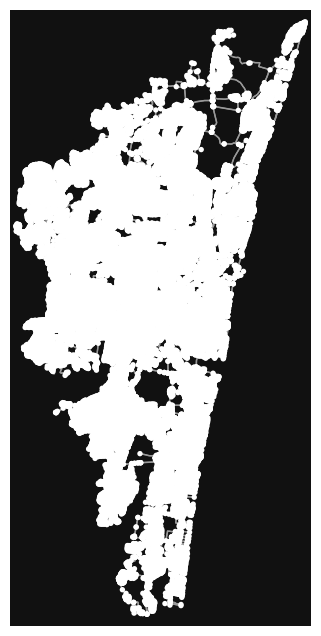

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
import osmnx as ox

# Download road network
G = ox.graph_from_place("Chennai, India", network_type="drive")

# Plot roads
ox.plot_graph(G)

In [ ]:
import osmnx as ox

stats = ox.basic_stats(G)

for k, v in stats.items():
    print(k, ":", v)

n : 68441
m : 173671
k_avg : 5.075057348665274
edge_length_total : 12312467.78077971
edge_length_avg : 70.89535835447317
streets_per_node_avg : 2.6642363495565524
streets_per_node_counts : {0: 0, 1: 15427, 2: 49, 3: 45067, 4: 7875, 5: 21, 6: 2}
streets_per_node_proportions : {0: 0.0, 1: 0.22540582399438933, 2: 0.0007159451206148361, 3: 0.6584795663418127, 4: 0.11506260867024153, 5: 0.00030683362312064407, 6: 2.9222249821013718e-05}
intersection_count : 53014
street_length_total : 6625468.159972393
street_segment_count : 90958
street_length_avg : 72.84096132250481
circuity_avg : 1.0402953639500037
self_loop_proportion : 0.0005057279183799116


Number of buildings: 277143


<Axes: >

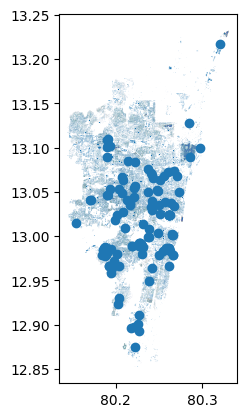

In [ ]:
from shapely.geometry import Polygon

# Get polygon
polygon = gdf.geometry.iloc[0]

# Download buildings
buildings = ox.features_from_polygon(
    polygon,
    tags={"building": True}
)

print("Number of buildings:", len(buildings))

buildings.plot()

In [ ]:
area = gdf_proj["area_sqkm"].iloc[0]

density = len(buildings) / area

print("Building Density per sq km:", density)


Building Density per sq km: 637.7820895945699


/tmp/ipython-input-2875574209.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["centroid"] = buildings.centroid


<Axes: >

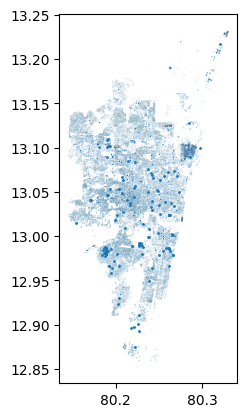

In [ ]:
# Count buildings per ward (if available)
buildings["centroid"] = buildings.centroid

buildings.plot(markersize=1)


In [ ]:
landuse = ox.features_from_polygon(
    polygon,
    tags={"landuse": True}
)

landuse["landuse"].value_counts()


,count
landuse,
residential,789
commercial,696
industrial,293
grass,199
retail,131
recreation_ground,83
cemetery,61
construction,60
railway,53


<Axes: >

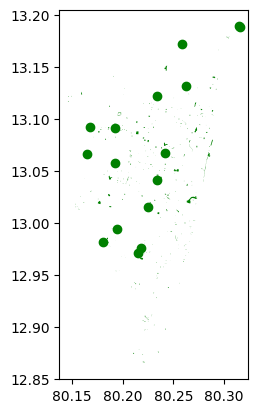

In [ ]:
green = ox.features_from_polygon(
    polygon,
    tags={"leisure": "park"}
)

green.plot(color="green")

In [ ]:
print("Number of parks:", len(green))

Number of parks: 391


In [ ]:
# Convert geometry to centroids
buildings["centroid"] = buildings.geometry.centroid

# Extract lat/lon
buildings["lat"] = buildings.centroid.y
buildings["lon"] = buildings.centroid.x

/tmp/ipython-input-3882717123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["centroid"] = buildings.geometry.centroid
/tmp/ipython-input-3882717123.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["lat"] = buildings.centroid.y
/tmp/ipython-input-3882717123.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings["lon"] = buildings.centroid.x


In [ ]:
buildings_tabular = buildings.drop(columns=["geometry", "centroid"])